### Adapting Assembly dataset to OadTR code

In [1]:
import pickle 
import json 
import  os 
import pandas as pd

# Load the data
# with open('/home/aleflabo/ego_procedural/OadTR/data/thumos_test_anno.pickle', 'rb') as f:
#     anno = pickle.load(f)
# with open('/home/aleflabo/ego_procedural/OadTR/data/thumos_all_feature_test_tsn_v2.pickle', 'rb') as f:
#     data = pickle.load(f)

path_to_save = '/home/aleflabo/ego_procedural/OadTR/data/assembly/OadTR_assembly/train+val_allMistakes_onlyThis'

VIEWS = ['HMC_21110305_mono10bit', 'HMC_84355350_mono10bit', 'HMC_21179183_mono10bit', 'HMC_84358933_mono10bit']
feature_dir = '/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/assembly101/data/TSM_features/'


In [3]:
# ADAPTING TO OLD ASSEMBLY SPLIT 

path = '/media/hdd/data/assembly101/data/annotations/coarse-annotations/coarse_splits/'
print(os.listdir(path))

with open('/home/aleflabo/ego_procedural/OadTR/data/data_info_new.json', 'r') as outfile:
    data_json = json.load(outfile)


train = pd.read_csv(path+'train_coarse_assembly.txt', header = None, sep = '\t')    
test = pd.read_csv(path+'test_coarse_assembly.txt', header = None, sep = '\t')    
val = pd.read_csv(path+'val_coarse_assembly.txt', header = None, sep = '\t')    

train_mistakes = data_json['assembly']['train_session_set']
test_mistakes = data_json['assembly']['test_session_set']

with open('/home/aleflabo/ego_procedural/OadTR/data/data_info_new.json', 'r') as outfile:
    data_json = json.load(outfile)

new_train = list(set(list(train[0].replace('assembly_', '', regex=True).replace('.txt', '', regex=True))).intersection(set(train_mistakes + test_mistakes)))
new_test = list(set(list(test[0].replace('assembly_', '', regex=True).replace('.txt', '', regex=True))).intersection(set(train_mistakes + test_mistakes)))
new_val = list(set(list(val[0].replace('assembly_', '', regex=True).replace('.txt', '', regex=True))).intersection(set(train_mistakes + test_mistakes)))
new_train = new_val + new_train

# with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/old_split_train+val/split.test', 'w') as outfile:
#     json.dump(new_test, outfile)

['train_coarse_disassembly.txt', 'val_coarse_assembly.txt', 'test_coarse_disassembly.txt', 'val_coarse_disassembly.txt', 'test_coarse_assembly.txt', 'train_coarse_assembly.txt']


In [3]:
# open txt file /home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/test_on_train/mapping_withBG_train.txt to read 
#split the line by space and subtract 1 from the first element of the list
# with open('/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/test_on_train/mapping_withBG_train.txt', 'r') as f:

# se folder non esiste, crealo
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)

with open(f'/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/groundTruth_no_BG_onlyThis_allMistakes/mapping_no_BG_onlyThis_allMistakes.txt', 'r') as f:
    mapping = f.readlines()
mapping = [x.strip() for x in mapping] 
mapping = [x.split(' ') for x in mapping]
mapping = [[int(x[0]), x[1]] for x in mapping]

mapping = [' '.join((str(x[0]),x[1])) for x in mapping]

# write the mapping to a txt file
with open(f'{path_to_save}/mapping_noBG_trimmed.txt', 'w') as f:
    for item in mapping:
        f.write("%s\n" % item)
        

In [4]:
# path_to_mapping = '/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/mapping_noBG.txt'
# path_to_mapping = '/home/aleflabo/ego_procedural/OadTR/data/assembly/train/mapping_noBG_train.txt'
path_to_mapping = f'{path_to_save}/mapping_noBG_trimmed.txt'

to_eliminate = ['nusar-2021_action_both_9026-b04b_9026_user_id_2021-02-03_163855',
                'nusar-2021_action_both_9061-c13d_9061_user_id_2021-02-09_143830',
                'nusar-2021_action_both_9034-c08b_9034_user_id_2021-02-23_175357',
                'nusar-2021_action_both_9054-c01a_9054_user_id_2021-02-08_154802',
                'nusar-2021_action_both_9024-c12c_9024_user_id_2021-02-23_153804',
                'nusar-2021_action_both_9024-c04c_9024_user_id_2021-02-03_142724',
                'nusar-2021_action_both_9015-c10c_9015_user_id_2021-02-02_165955',
                'nusar-2021_action_both_9074-a03_9074_user_id_2021-02-11_151600',
                'nusar-2021_action_both_9014-c01b_9014_user_id_2021-02-02_150612',
                'nusar-2021_action_both_9026-b08a_9026_user_id_2021-02-03_165029',
                'nusar-2021_action_both_9024-c09b_9024_user_id_2021-02-03_143716'
                ]


def load_action_mapping(map_fname):
    label2index = dict()
    index2label = dict()
    with open(map_fname, 'r') as f:
        content = f.read().split('\n')[0:-1]
        for line in content:
            label2index[line.split()[1]] = int(line.split()[0])
            index2label[int(line.split()[0])] = line.split()[1]

    return label2index, index2label

def load_split(map_fname):
    file_name = []
    with open(map_fname, 'r') as f:
        content = f.read().split('\n')[0:-1]
        for line in content:
            if not line.replace('.csv', '') in to_eliminate:
                file_name.append(line.replace('.csv', ''))

    return file_name

assembly = {}
assembly["class_index"] = list(load_action_mapping(path_to_mapping)[0].keys())

# assembly["train_session_set"] = new_train # ! load_split('/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/split.train')
# assembly["test_session_set"] = new_test # ! load_split('/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/split.test')
assembly["train_session_set"] = load_split('/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/split.train')
assembly["test_session_set"] = load_split('/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/split.test')

# assembly["val_session_set"] = new_val

# read json file    
with open('/home/aleflabo/ego_procedural/OadTR/data/data_info_new.json', 'r') as outfile:
    data_json = json.load(outfile)

data_json['assembly'] = assembly

# save json file
with open(f'{path_to_save}/data_info_new.json', 'w') as outfile:
    json.dump(data_json, outfile)

In [5]:
len(list(load_action_mapping(path_to_mapping)[0].keys()))
with open(f'{path_to_save}/data_info_new.json', 'r') as outfile:
    data_json = json.load(outfile)
len(data_json['assembly']['class_index'])

113

In [6]:
from glob import glob
import numpy as np
from tqdm import tqdm

def load_action_mapping(map_fname):
    label2index = dict()
    index2label = dict()
    with open(map_fname, 'r') as f:
        content = f.read().split('\n')[0:-1]
        for line in content:
            label2index[line.split()[1]] = int(line.split()[0])
            index2label[int(line.split()[0])] = line.split()[1]

    return label2index, index2label

# label2index, index2label = load_action_mapping('/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/mapping.txt')

label2index, index2label = load_action_mapping(path_to_mapping)

# files = '/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/groundTruth_no_BG/*.txt'
files = '/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/groundTruth_no_BG_onlyThis_allMistakes/*.txt'

# files = '/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/groundTruth_frames_BG_train/*.txt'
files = glob(files)

assembly['labels_train'] = {}
assembly['labels_test'] = {}
assembly['labels_val'] = {}
assembly['labels'] = {}
for fname in tqdm(files):
    if 'mapping' in fname:
        continue
    if fname.replace('.txt', '').split('/')[-1] in assembly["train_session_set"]:
        suffix = 'train'    
    # elif fname.replace('.txt', '').split('/')[-1] in assembly["val_session_set"]:
    #     suffix = 'val'
    elif fname.replace('.txt', '').split('/')[-1] in assembly["test_session_set"]:
        suffix = 'test'
    else: 
        print('video {} not in any split'.format(fname.replace('.txt', '').split('/')[-1]))
        continue
    with open(fname) as fp:
        labels = fp.read().split('\n')[:-1]
    gt = []
    for label in labels:
        zeros = np.zeros(len(assembly["class_index"]))
        
        try:    
            zeros[label2index[label]] = 1
        except:
            try:
                zeros[label2index[label.split('-')[0] + '-' + label.split('-')[2] + '-' + label.split('-')[1]]] = 1
            except:
                print(label)
                a
                      
        gt.append(zeros.reshape(1, -1))
    gt = np.concatenate(gt, axis=0)

    assembly['labels_{}'.format(suffix)][fname.replace('.txt', '').split('/')[-1]] = {}
    assembly['labels_{}'.format(suffix)][fname.replace('.txt', '').split('/')[-1]]['anno'] = gt
    assembly['labels_{}'.format(suffix)][fname.replace('.txt', '').split('/')[-1]]['feature_length'] = gt.shape[0]
    
# save pickle file
with open(f'{path_to_save}/assembly_test_anno.pickle', 'wb') as outfile:
    pickle.dump(assembly['labels_test'], outfile)
    
# save pickle file
with open(f'{path_to_save}/assembly_train_anno.pickle', 'wb') as outfile:
    pickle.dump(assembly['labels_train'], outfile)

# # save pickle file
# with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/old_split/assembly_val_anno.pickle', 'wb') as outfile:
#     pickle.dump(assembly['labels_val'], outfile)

 22%|██▏       | 72/329 [00:01<00:05, 45.63it/s]

video nusar-2021_action_both_9014-c01b_9014_user_id_2021-02-02_150612 not in any split


 27%|██▋       | 90/329 [00:02<00:05, 41.46it/s]

video nusar-2021_action_both_9054-c01a_9054_user_id_2021-02-08_154802 not in any split


 36%|███▌      | 119/329 [00:02<00:04, 45.70it/s]

video nusar-2021_action_both_9026-b04b_9026_user_id_2021-02-03_163855 not in any split
video nusar-2021_action_both_9061-c13d_9061_user_id_2021-02-09_143830 not in any split


 61%|██████    | 200/329 [00:03<00:01, 67.98it/s]

video nusar-2021_action_both_9024-c04c_9024_user_id_2021-02-03_142724 not in any split


 70%|███████   | 231/329 [00:04<00:01, 66.48it/s]

video nusar-2021_action_both_9026-b08a_9026_user_id_2021-02-03_165029 not in any split
video nusar-2021_action_both_9074-a03_9074_user_id_2021-02-11_151600 not in any split


 85%|████████▌ | 281/329 [00:05<00:00, 67.40it/s]

video nusar-2021_action_both_9024-c09b_9024_user_id_2021-02-03_143716 not in any split
video nusar-2021_action_both_9024-c12c_9024_user_id_2021-02-23_153804 not in any split


 96%|█████████▋| 317/329 [00:05<00:00, 66.08it/s]

video nusar-2021_action_both_9034-c08b_9034_user_id_2021-02-23_175357 not in any split
video nusar-2021_action_both_9015-c10c_9015_user_id_2021-02-02_165955 not in any split


100%|██████████| 329/329 [00:05<00:00, 56.06it/s]


In [7]:
import pandas as pd
def _load_assembly_features(file_name, view, env, split):

    path = '/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/assembly101/data/annotations/mistake-annotations/mistake_labels/'
    mistake_labels = pd.read_csv(path+file_name+'.csv')
    
    st_frame = mistake_labels['start_frame'].values[0]
    end_frame = mistake_labels['end_frame'].values[-1]

    elements = []
    with env[view].begin() as e:
        real_gt = []
        for tuple in  range(len(mistake_labels)):
            for i in range(mistake_labels['start_frame'].iloc[tuple], mistake_labels['end_frame'].iloc[tuple]):
                key = file_name.replace('.csv', '').split('/')[-1] + frames_format.format(view, view, i)
                data = e.get(key.strip().encode('utf-8'))
                if data is None:
                    print('no available data: {} {}'.format(file_name, view))
                    return -1*np.ones((end_frame-st_frame,2048))
                    # exit(2)
                data = np.frombuffer(data, 'float32')
                assert data.shape[0] == 2048
                elements.append(data)

            gt = assembly['labels_{}'.format(split)][file_name]['anno'][mistake_labels['start_frame'].iloc[tuple] - st_frame : mistake_labels['end_frame'].iloc[tuple] - st_frame,:]
            # assembly['labels_{}'.format(split)][file_name]['anno_new'] += gt
            # assembly['labels_{}'.format(split)][file_name]['feature_length'] = gt.shape[0]

            real_gt.append(gt)
    
    
    feature = np.array(elements)
    real_gt = np.concatenate(real_gt, axis=0)
    return feature, real_gt


In [9]:
import lmdb
#don't print warnings
import warnings
from tqdm import tqdm
import pickle 

warnings.filterwarnings("ignore")

with open('/home/aleflabo/ego_procedural/CVPR22-POC/statistic_input.pkl', 'rb') as f:
    statistic = pickle.load(f)
env = {view: lmdb.open(f'{feature_dir}/{view}', readonly=True, lock=False) for view in VIEWS}
frames_format = "/{}/{}_{:010d}.jpg"
assembly['train_feats'] = {}
assembly['test_feats'] = {}
assembly['val_feats'] = {}

split='test'
seen = []
for video in tqdm(assembly["{}_session_set".format(split)]):
    if (video in seen) or (video in to_eliminate):
        continue
    info = statistic[video.replace('.csv', '').split('/')[-1]]
    actual_views = list(set(VIEWS).intersection(set(info.keys())))
    if len(actual_views) == 0:
        print('no available data: {}'.format(video))
        continue
    for view in actual_views: 
        assembly['{}_feats'.format(split)][video] = {}
        assembly['{}_feats'.format(split)][video]['rgb'] = {}
        assembly['{}_feats'.format(split)][video]['flow'] = {}

        feats, real_gt = _load_assembly_features(video, view, env, split)
        assembly['labels_{}'.format(split)][video]['anno'] = real_gt
        assembly['labels_{}'.format(split)][video]['feature_length'] = real_gt.shape[0]

        if (feats != -1*np.ones((feats.shape[0], 2048))).all():
            assembly['{}_feats'.format(split)][video]['rgb'] = feats
            assembly['{}_feats'.format(split)][video]['flow'] = feats
            seen.append(video)
            # video = view + '-' + old_video
            # new_video_list.append(video)
            # features[video] = feats

        else:
            print('skipping video', video)
            continue

    
with open(f'{path_to_save}/assembly_all_feature_{split}_tsn_v2.pickle', 'wb') as outfile:
    pickle.dump(assembly['{}_feats'.format(split)], outfile)

# # # save pickle file
# # with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/old_split/assembly_test_anno.pickle', 'wb') as outfile:
# #     pickle.dump(assembly['labels_test'], outfile)
    
# # save pickle file
# with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/old_split/assembly_{}_anno.pickle'.format(split), 'wb') as outfile:
#     pickle.dump(assembly['labels_{}'.format(split)], outfile)

100%|██████████| 182/182 [04:16<00:00,  1.41s/it]


In [26]:
# open pickle
with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/old_split/assembly_train_anno.pickle', 'rb') as f:
    train_anno = pickle.load(f)

train_actions = []
for video in train_anno.keys():
    train_actions += list(set(np.argmax(train_anno[video]['anno'], 1)))
len(set(train_actions))

# open pickle
with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/old_split/assembly_test_anno.pickle', 'rb') as f:
    test_anno = pickle.load(f)
    
test_actions = []
for video in test_anno.keys():
    test_actions += list(set(np.argmax(test_anno[video]['anno'], 1)))

len(set(test_actions))


In [27]:
train_actions = []
for video in train_anno.keys():
    train_actions += list(set(np.argmax(train_anno[video]['anno'], 1)))

len(set(train_actions))

213

In [25]:
val_actions = []
for video in val_anno.keys():
    val_actions += list(set(np.argmax(val_anno[video]['anno'], 1)))

len(set(val_actions))



145

In [23]:
test_actions = []
for video in test_anno.keys():
    test_actions += list(set(np.argmax(test_anno[video]['anno'], 1)))

len(set(test_actions))



146

In [2]:
import pickle

# open pickle
with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/old_split/assembly_all_feature_val_tsn_v2.pickle', 'rb') as f:
    val = pickle.load(f)

In [17]:
val['nusar-2021_action_both_9054-a18_9054_user_id_2021-02-08_153620']['rgb'].shape

(5209, 2048)

In [50]:
import numpy as np
id = 1234
np.where(val['nusar-2021_action_both_9054-a18_9054_user_id_2021-02-08_153620']['rgb'][id] == 0)[0].shape, (np.where(val['nusar-2021_action_both_9054-a18_9054_user_id_2021-02-08_153620']['rgb'][id] == 0)[0].shape[0]/2048)*100


((177,), 8.642578125)

In [57]:
import numpy as np

f = np.load('/home/aleflabo/ego_procedural/OadTR/data/EpicTents/TSM/features/02/02_frame_000007.npy', allow_pickle=True)
np.where(f == 0)[0].shape, f.shape, np.where(f == 0)[0].shape[0]/2048

((979,), (2048,), 0.47802734375)

In [48]:
name = 'nusar-2021_action_both_9016-a24_9016_user_id_2021-02-17_135905'
pd.read_csv(f'/media/hdd/data/assembly101/data/annotations/mistake-annotations/original_release/{name}.csv', sep = ',', header = None)

,0,1,2,3,4,5,6
0,2552,3727,attach,wheel,chassis,correct,NaN
1,3727,4031,attach,engine,chassis,correct,NaN
2,4031,4148,attach,interior,chassis,correct,NaN
3,4148,4306,attach,body,interior,mistake,wrong order
4,4306,4632,attach,bumper,body,correct,NaN
5,4632,4912,attach,engine cover,body,correct,NaN
6,5367,5465,detach,engine cover,body,mistake,shouldn't have happened
7,5465,5692,detach,bumper,body,mistake,shouldn't have happened
8,5692,5740,detach,body,interior,correction,NaN
9,5740,6065,attach,rocker panel,chassis,correct,NaN


In [52]:
len(os.listdir('/home/aleflabo/TOT-CVPR22/datasets/Assembly/groundTruth_no_BG'))

328

In [49]:
import pandas as pd

pd.read_csv(f'/media/hdd/data/assembly101/data/annotations/coarse-annotations/coarse_labels/assembly_{name}.txt', sep = '\t', header = None)

,0,1,2,3
0,2552,3727,attach wheel,NaN
1,3727,4031,attach engine,NaN
2,4031,4148,attach interior,NaN
3,4148,4306,attach body,NaN
4,4306,4632,attach bumper,NaN
5,4632,4912,attach engine cover,NaN
6,4912,5367,attempt to attach rocker panel,NaN
7,5367,5465,detach engine cover,NaN
8,5465,5692,detach bumper,NaN
9,5692,5740,detach body,NaN


### Postprocessing for Anomaly Detection

In [31]:
import pickle
import numpy as np
dec_step = 0
with open('/home/aleflabo/ego_procedural/OadTR/models/epicTents/en_3_decoder_5_lr_dr_solved/results/end_frame.pickle'.format(str(dec_step)), 'rb') as f:
    end = pickle.load(f)
with open('/home/aleflabo/ego_procedural/OadTR/models/epicTents/en_3_decoder_5_lr_dr_solved/results/start_frame.pickle', 'rb') as f:
    start = pickle.load(f)
with open('/home/aleflabo/ego_procedural/OadTR/models/epicTents/en_3_decoder_5_lr_dr_solved/results/video_names_test.pickle', 'rb') as f:
    video_names = pickle.load(f)
with open('/home/aleflabo/ego_procedural/OadTR/models/epicTents/en_3_decoder_5_lr_dr_solved/results/results_enc_test.pickle', 'rb') as f:
    res_enc = pickle.load(f)
with open('/home/aleflabo/ego_procedural/OadTR/models/epicTents/en_3_decoder_5_lr_dr_solved/results/results_dec_test_7.pickle', 'rb') as f:
    res_dec = pickle.load(f)

start = np.array(start)
end = np.array(end)
res_enc = np.asarray(res_enc).T
res_dec = np.asarray(res_dec['probs'])

In [ ]:
import pandas as pd
import os
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import roc_auc_score
from scipy.ndimage import gaussian_filter1d

def open_gt(vname):

    # path = '/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/mistake-annotations/mistake_labels'
    path = '/home/aleflabo/ego_procedural/OadTR/data/EpicTents/adapted_annotations/mistake_annotations'
    mistake_labels = pd.read_csv(os.path.join(path, vname))
    mistake_labels['end_frame_shifted'] = mistake_labels['end_frame'] - mistake_labels['start_frame'][0]
    mistake_labels['start_frame_shifted'] = mistake_labels['start_frame'] - mistake_labels['start_frame'][0]
    
    gts = []
    mistake_labels['gts'] = (mistake_labels['label'] == 'correct')*1

    for i in range(len(mistake_labels)):
        duration = mistake_labels['end_frame_shifted'].iloc[i] - mistake_labels['start_frame_shifted'].iloc[i]
        gts += ([mistake_labels['gts'].iloc[i]] * duration)

    return gts

def score_process(score, shift=18, kernel_size=30):
    
    scores_shifted = np.zeros_like(score)
    scores_shifted[shift:] = score[:-shift]
    score = gaussian_filter1d(scores_shifted, kernel_size)
    
    return score
set_video_names = set(video_names)

/media/hdd/miniconda3/envs/light/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import torch
def reverse_sliding(st, rec_probs, window_size=64):
    grouped_sliding = np.zeros(shape=(st.shape[0], rec_probs.shape[1]))
    count_sliding = np.zeros(shape=(st.shape[0]))
    
    for n in range(st.shape[0]):
        grouped_sliding[n:n+window_size] += rec_probs[n:n+window_size]
        count_sliding[n:n+window_size] += 1
    # grouped_sliding = torch.div(torch.tensor(grouped_sliding), torch.tensor(count_sliding).unsqueeze(-1))
    return grouped_sliding




In [23]:
import torch.nn.functional as F

model_scores = []
gts = []
count = 0
for video in set_video_names:

    indices = np.where(np.array(video_names) == video)[0]
    gt = open_gt(video + '.csv')[:indices.shape[0]]
    gts.append(gt)
    st = start[indices]
    en = end[indices]
    rec_probs = res_dec[:, indices].T

    # rec_dec_probs = res_dec[:, indices].T
    # rec_probs = reverse_sliding(st, soft, window_size=64)
    # rec_dec_probs = reverse_sliding(st, rec_dec_probs, window_size=64)

    clip_score = np.max(rec_probs, axis = 1) #.reshape(1,-1)
    # clip_dec_score = np.max(rec_dec_probs, axis = 1) #.reshape(1,-1)
    # en = score_process(torch.softmax(torch.tensor(res_enc['probs'][:, indices].T).permute(1,0), dim=0).max(0)[0].numpy(), kernel_size=100)
    # de = score_process(torch.softmax(torch.tensor(res_dec['probs'][:, indices].T).permute(1,0), dim=0).max(0)[0].numpy(), kernel_size=150)
    
    kl_loss = nn.KLDivLoss(reduction="none")
    # input should be a distribution in the log space
    rec_probs = res_enc[:, indices].T
    # rec_probs = reverse_sliding(st, rec_probs, window_size=64)
    # soft_enc = F.softmax(torch.tensor(rec_probs), dim=-1).cpu().numpy()
    rec_dec_probs = res_dec[:, indices].T
    # rec_dec_probs = reverse_sliding(st, rec_dec_probs, window_size=64)
    # soft_dec = F.softmax(torch.tensor(rec_dec_probs), dim=-1).cpu().numpy()
    clip_score = kl_loss(torch.tensor(rec_probs), torch.tensor(rec_dec_probs)).mean(1)

    # clip_score_log = np.log1p(clip_score)
    # clip_score = np.mean(clip_score, axis=0) + (np.amax(clip_score_log, axis=0)-np.amin(clip_score_log, axis=0))
    clip_score = score_process(clip_score, kernel_size=150)

    model_scores.append(clip_score[:len(gt)])
    auc = roc_auc_score(gt,clip_score[:len(gt)])
    print(auc) 
    count += 1
    # if count==16:
    #     a
model_scores = np.concatenate(model_scores,axis=0)
# model_scores = score_process(model_scores, kernel_size=200)
auc = roc_auc_score(np.concatenate(gts,axis=0),model_scores)
print('final auc:',auc)


0.9991889864357981
0.6117557294133813
0.7651973382402759
0.678629936940195
0.7602294988943882
0.8291852925778261
0.3315711385592127
0.7174864793676504
0.9624845912350695
0.3523201944254576
0.7114762574598024
0.6485619909452878
0.6256891661139414
0.28624809429788933
0.7413203874705775
0.6246458272400284
0.3388665550330754
0.4307757002327851
0.6057640201109151
0.8524864200931843
0.9502450458556317
0.28564900707757845
0.734394434974893
0.8749220112303827
0.7836611959404678
0.5828060782021793
0.5252512570853026
0.4888546629913132
0.7711084801763278
0.7689007282073249
0.7559027281249503
0.12980417786169002
0.4205667995161015
0.6204593407547312
0.6633540472045873
0.4972689403552289
0.8013704206822965
0.6517146227222772
0.45202429892721385
0.36030106095203296
0.3714185599389456
0.7889853035003593
0.7610205230564513
0.5696860060213644
0.9176330299027768
0.7259673949666952
0.9744311517710532
0.46991201658571613
0.7077988145801837
0.5585038074049957
0.4833621122160971
0.7634398797929512
0.194171

array([-6.78861618e-01, -2.05334291e-01, -2.72004679e-02, -2.70878728e-02,
       -2.36729346e-02, -1.12951156e-02, -1.00061540e-02, -2.40091793e-03,
       -2.14877911e-03, -1.41496537e-03, -1.41235406e-03, -1.20784191e-03,
       -9.32291034e-04, -5.43737551e-04, -5.29334357e-04, -5.09109523e-04,
       -4.92577732e-04, -4.64009237e-04, -3.88978573e-04, -3.64630716e-04,
       -3.46153683e-04, -2.12673040e-04, -1.76271293e-04, -1.74589237e-04,
       -1.30362227e-04, -1.11259775e-04, -1.07355932e-04, -1.04004328e-04,
       -9.84949656e-05, -9.37679797e-05, -9.25010681e-05, -8.66123592e-05,
       -8.14487721e-05, -7.44633435e-05, -7.35959620e-05, -7.34283385e-05,
       -7.28566374e-05, -7.20078315e-05, -6.21169747e-05, -5.73504949e-05,
       -5.46534975e-05, -5.32644335e-05, -5.32277700e-05, -5.26632612e-05,
       -5.08285302e-05, -4.82001378e-05, -4.56598755e-05, -4.20383403e-05,
       -4.02606238e-05, -3.99122473e-05, -3.97025760e-05, -3.73012808e-05,
       -3.56500314e-05, -

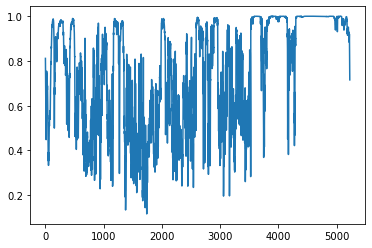

In [12]:
import matplotlib.pyplot as plt

plt.plot(rec_probs.max(1))
np.sort(-rec_probs[5])

In [20]:
import torch.nn as nn

m = nn.LogSoftmax(dim=1)
loss = nn.NLLLoss()
# input is of size N x C = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
output = loss(m(input), target)

rec_probs = res_enc[:, indices].T
soft_enc = F.softmax(torch.tensor(rec_probs), dim=-1).cpu().numpy()
rec_dec_probs = res_dec[:, indices].T
soft_dec = F.softmax(torch.tensor(rec_dec_probs), dim=-1).cpu().numpy()

loss(torch.tensor(soft), torch.tensor(soft_dec))

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [18]:
import torch.nn as nn

kl_loss = nn.KLDivLoss(reduction="none")
# input should be a distribution in the log space
rec_probs = res_enc[:, indices].T
rec_probs = reverse_sliding(st, rec_probs, window_size=64)
# soft_enc = F.softmax(torch.tensor(rec_probs), dim=-1).cpu().numpy()
rec_dec_probs = res_dec[:, indices].T
rec_dec_probs = reverse_sliding(st, rec_dec_probs, window_size=64)
# soft_dec = F.softmax(torch.tensor(rec_dec_probs), dim=-1).cpu().numpy()
output = kl_loss(torch.tensor(rec_probs), torch.tensor(rec_dec_probs))
output.mean(1)

tensor([-1.0648e-02, -2.2280e-02, -3.8972e-02,  ..., -1.7673e+01,
        -1.9911e+01, -1.7268e+01], dtype=torch.float64)

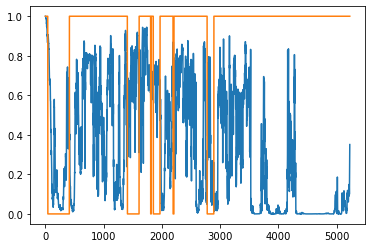

In [21]:
import matplotlib.pyplot as plt
plt.plot((output.mean(1) - min(output.mean(1)))/(max(output.mean(1))-min(output.mean(1))))
plt.plot(gt)

In [68]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
soft = F.softmax(torch.tensor(rec_probs), dim=-1).cpu().numpy()
# plt.plot(soft)
# plt.plot(torch.softmax(torch.tensor(rec_probs).permute(1,0), dim=0).max(0)[0]) #, rec_dec_probs.shape

np.sort(-soft[5])

array([-0.00509558, -0.00410439, -0.00388159, -0.0035943 , -0.00351574,
       -0.00348117, -0.00343209, -0.00342484, -0.0033925 , -0.00338474,
       -0.00336633, -0.00336124, -0.00336018, -0.00335951, -0.00335891,
       -0.00335533, -0.00335524, -0.00335521, -0.00335513, -0.0033549 ,
       -0.00335485, -0.00335468, -0.00335468, -0.00335458, -0.00335458,
       -0.00335454, -0.00335447, -0.00335445, -0.00335443, -0.00335442,
       -0.00335439, -0.00335439, -0.00335435, -0.00335435, -0.00335434,
       -0.00335433, -0.00335431, -0.00335431, -0.00335429, -0.00335428,
       -0.00335427, -0.00335427, -0.00335427, -0.00335426, -0.00335426,
       -0.00335425, -0.00335424, -0.00335423, -0.00335422, -0.00335422,
       -0.00335422, -0.00335422, -0.00335421, -0.00335421, -0.0033542 ,
       -0.0033542 , -0.00335419, -0.00335418, -0.00335418, -0.00335418,
       -0.00335418, -0.00335418, -0.00335418, -0.00335418, -0.00335418,
       -0.00335418, -0.00335418, -0.00335418, -0.00335418, -0.00

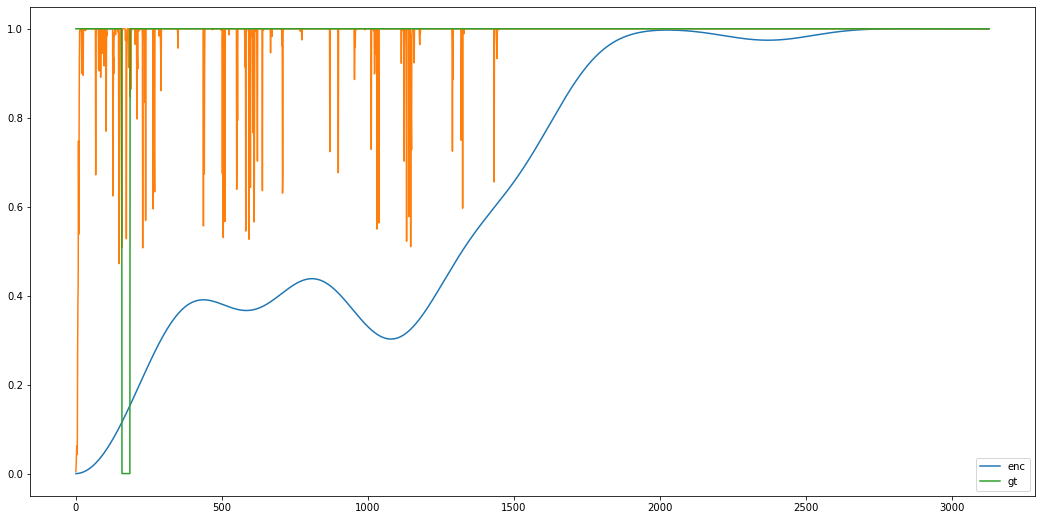

In [11]:
import matplotlib.pyplot as plt
import torch
plt.figure(figsize=(18,9))
en = score_process(torch.softmax(torch.tensor(res_enc[:, indices].T).permute(1,0), dim=0).max(0)[0].numpy(), kernel_size=150)
# de = score_process(torch.softmax(torch.tensor(res_dec['probs'][:, indices].T).permute(1,0), dim=0).max(0)[0].numpy(), kernel_size=150)
plt.plot((en - min(en))/(max(en)-min(en)), label = 'enc')
plt.plot(torch.softmax(torch.tensor(rec_probs).permute(1,0), dim=0).max(0)[0].numpy())
# plt.plot((de - min(de))/(max(de)-min(de)), label = 'dec')
# plt.plot((en+de - min(en+de))/(max(en+de)-min(en+de)), label = 'en+dec')

plt.plot(gt, label = 'gt')
plt.legend()
plt.show()

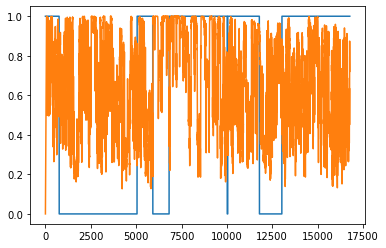

In [10]:
import matplotlib.pyplot as plt

plt.plot(gt)
# plt.plot(np.max(rec_probs, axis = 1) )
plt.plot(((clip_score) - min( clip_score)) / ((max( clip_score)) - min( clip_score)))
# plt.plot(((model_scores) - min( model_scores)) / ((max( model_scores)) - min( model_scores)))

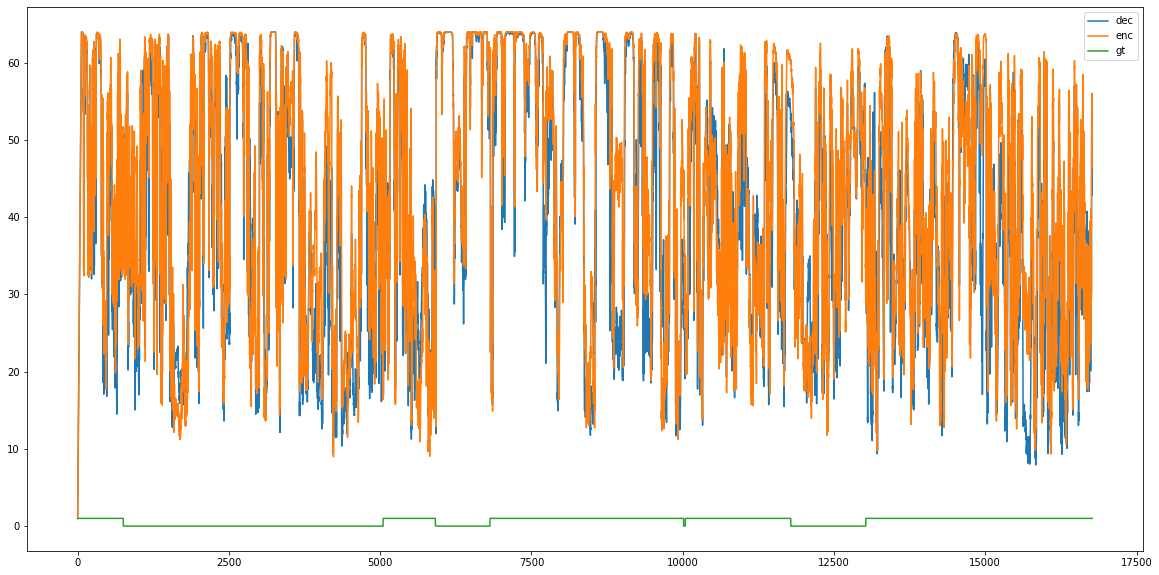

In [11]:
# greater plot size
plt.figure(figsize=(20,10))

plt.plot(clip_dec_score, label='dec')
plt.plot(clip_score, label='enc')
plt.plot(gt, label='gt')
plt.legend()
plt.show()

### Visualization

(array([ 64,  64,  64, ..., 127, 127, 127]), (16769,))

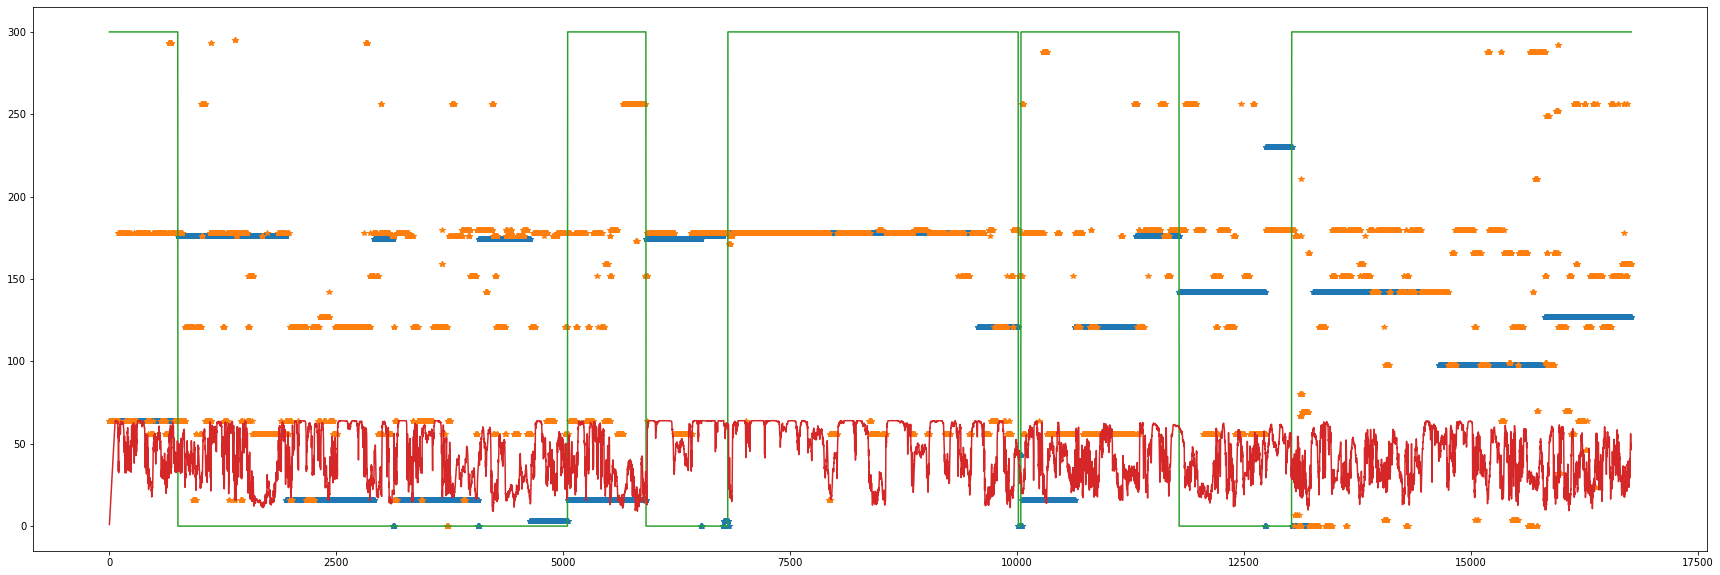

In [20]:
plt.figure(figsize=(30,10))
labels = torch.softmax(torch.tensor(res_dec['labels'][:, indices].T).permute(1,0), dim=0).argmax(0).numpy()
plt.plot(labels,'*')
plt.plot(torch.softmax(torch.tensor(res_dec['probs'][:, indices].T).permute(1,0), dim=0).argmax(0).numpy(),'*')
plt.plot(np.array(open_gt(video + '.csv')[len(open_gt(video + '.csv'))-indices.shape[0]:])*300)
plt.plot(clip_score, label='enc')


In [19]:
import torch
def compute_durations(label_list):
    durations = []
    actual = label_list[0]
    count = 0
    length = 0
    for label in label_list:
        if label == actual:
            count += 1
        else:
            durations.append((actual, count))
            length += count
            count = 1
            actual = label
    durations.append((actual, count))
    length += count
    print(length)
    return durations

def generate_N_colors(N):
    cmap = plt.get_cmap('tab20')  # You can choose from a variety of colormaps
    colors = [cmap(i) for i in range(N)]
    return colors

# open pickle
import pickle   
with open('/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/actions_cleaned.pkl', 'rb') as f:
    train_actions = pickle.load(f)
    
#open txt 
with open('/home/aleflabo/ego_procedural/CVPR22-POC/dataset/Assembly/mapping_noBG.txt', 'r') as f:
    mapping = f.readlines()

In [20]:
seg_preds = torch.softmax(torch.tensor(res_enc.T).permute(1,0), dim=0).argmax(0).numpy()

In [21]:
# load pickle file
import pickle
with open('/home/aleflabo/ego_procedural/OadTR/data/assembly/assembly_test_anno.pickle', 'rb') as outfile:
    test_files_gt = pickle.load(outfile)

In [38]:
[331,  281, 137, 148] # 312,
i = 40
video = "nusar-2021_action_both_9035-c14a_9035_user_id_2021-02-18_164650"
indices = np.where(np.array(video_names) == video)[0]
vname = video
gt_durations = compute_durations(torch.softmax(torch.tensor(test_files_gt[video]['anno']).permute(1,0), dim=0).argmax(0).numpy())
pred_durations = compute_durations(seg_preds[indices])
# logit = logits[i]
# rank_l = att_rank_loss[i]
# centre_l = centre_loss[i]
# entr = entropies[i]
# logit_top5 = seg_logit_top5[i]
# logit_top1 = seg_logit[i]

mapp = {}
for action in mapping:
    mapp[int(action.split(' ')[0])] = action.split(' ')[1].replace('\n','')
vname

7727
7655


'nusar-2021_action_both_9035-c14a_9035_user_id_2021-02-18_164650'

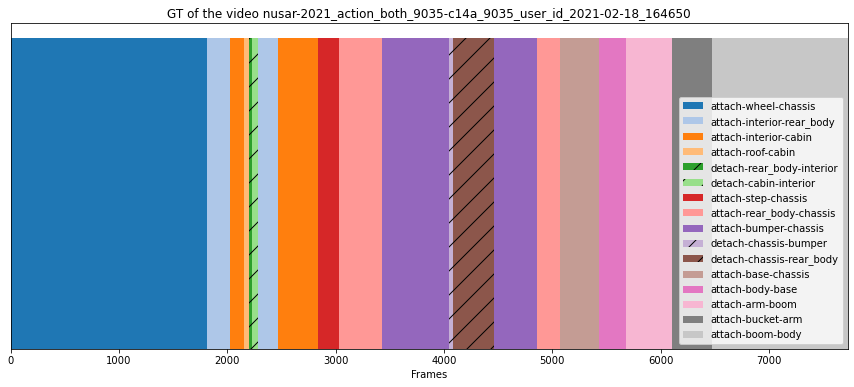

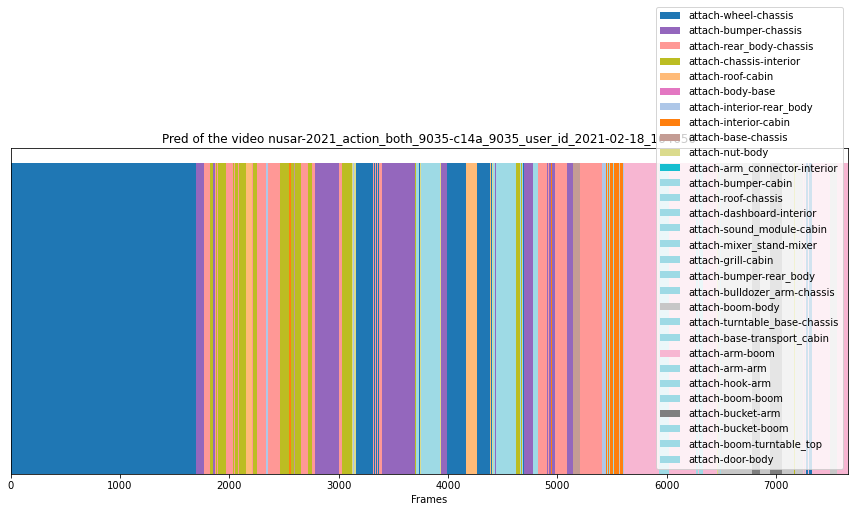

In [39]:
#create a plot of duration of each action in the video
import matplotlib.pyplot as plt
import numpy as np



current_frame = 0
action_colors = generate_N_colors(len(gt_durations))  # Define colors for each action

# Create a new figure
plt.figure(figsize=(15, 6))


# Initialize variables for plotting
current_frame = 0

# Plot each action
count = 0
action_color_dict = {}  
handles = []

curr = []

for action, length in gt_durations:
    
    if not action in action_color_dict:
        action_color_dict[action] = action_colors[count]
        color = action_colors[count]
        count+=1
    
    else:
        color = action_color_dict[action]
    hatch = ''
    inverted = mapp[action].split('-')[0] + '-' + mapp[action].split('-')[2] + '-' + mapp[action].split('-')[1]
    if (mapp[action] not in train_actions) and (inverted not in train_actions):
        hatch = '/'
    plt.bar(range(current_frame, current_frame + length), [1], width=length, align='edge', color=color, label=mapp[action], hatch=hatch)
    current_frame += length
    curr.append(current_frame)

# Set x-axis label and title
plt.xlabel('Frames')
plt.title('GT of the video {}'.format(vname.replace('.csv','')))
plt.yticks([])
plt.xlim([0,current_frame])

# Create a custom legend with unique labels
unique_labels = set(label.get_text() for label in handles)
unique_handles = [handles[i] for i, label in enumerate(handles) if label.get_text() in unique_labels]

def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='lower right')

legend_without_duplicate_labels(plt)

# Add a legend
# plt.legend(loc='upper right')

# Show the plot
plt.show()


action_colors = generate_N_colors(len(pred_durations))  # Define colors for each action

# Create a new figure
plt.figure(figsize=(15, 6))


# Initialize variables for plotting
current_frame = 0

# Plot each action
# count = 0
curr = []
for action, length in pred_durations:
    if not action in action_color_dict:
        action_color_dict[action] = action_colors[count]
        color = action_colors[count]
        count+=1

    else:
        color = action_color_dict[action]
    plt.bar(range(current_frame, current_frame + length), [1], width=length, align='edge',color=color, label=mapp[action])
    curr.append(current_frame)
    current_frame += length

# Set x-axis label and title
plt.xlabel('Frames')
plt.title('Pred of the video {}'.format(vname.replace('.csv','')))
plt.yticks([])
plt.xlim([0,current_frame])

# Add a legend
# plt.legend(loc='upper right')
# plt.plot((logit - min(logit))/(max(logit)-min(logit))+1, label='logit')
# plt.plot((logit_top1 - min(logit_top1))/(max(logit_top1)-min(logit_top1))+2)
# plt.plot((logit_top5 - min(logit_top5))/(max(logit_top5)-min(logit_top5))+2)
# plt.plot((rank_l - min(rank_l)) / (max(rank_l) - min(rank_l))+1, label='ranking loss')
# plt.plot((centre_l - min(centre_l)) / (max(centre_l) - min(centre_l)) +1)
# plt.plot(((1-entr - min(1-entr))/(max(1-entr)-min(1-entr)))+2)
legend_without_duplicate_labels(plt)

# Show the plot
plt.show()
    